In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df=pd.read_excel("C:/Users/arjun/Downloads/data_glotip.xlsx")

#### EDA on Human Trafiking data

In [235]:
df.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
0,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
1,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
2,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


In [236]:
df.shape

(46556, 13)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 0 to 46555
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Iso3_code            46530 non-null  object
 1   Country              45599 non-null  object
 2   Region               45599 non-null  object
 3   Subregion            45599 non-null  object
 4   Indicator            46556 non-null  object
 5   Dimension            46556 non-null  object
 6   Category             46469 non-null  object
 7   Sex                  46556 non-null  object
 8   Age                  46556 non-null  object
 9   Year                 46556 non-null  int64 
 10  Unit of measurement  46556 non-null  object
 11  txtVALUE             46556 non-null  object
 12  Source               46556 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.6+ MB


#### Preprocessing Data

In [238]:
df.nunique()

Iso3_code               207
Country                 200
Region                    5
Subregion                17
Indicator                 5
Dimension                 4
Category                435
Sex                       5
Age                       4
Year                     19
Unit of measurement       1
txtVALUE               1250
Source                    1
dtype: int64

In [239]:
df['Source'].unique()

array(['GLOTIP'], dtype=object)

In [240]:
df['Unit of measurement'].unique()

array(['Counts'], dtype=object)

In [241]:
#The Source and Unit of measurement column values are constant for all all rows , these columns dont have much significance for the analysis
del df['Source']
del df['Unit of measurement']

##### 1. Handling Missing Values

In [242]:
df.drop_duplicates(inplace=True)

In [243]:
df.isnull().sum()

Iso3_code     26
Country      957
Region       957
Subregion    957
Indicator      0
Dimension      0
Category      87
Sex            0
Age            0
Year           0
txtVALUE       0
dtype: int64

In [244]:
df[df['Iso3_code'].isnull()]

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,txtVALUE
37751,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2017,<5
37752,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2018,<5
37753,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2018,<5
37754,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2018,<5
37755,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2018,<5
37756,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2019,<5
37757,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Male,0 to 17 years,2019,<5
37758,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,by form of exploitation,Sexual exploitation,Male,18 years or over,2019,<5
37759,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,0 to 17 years,2020,<5
37760,NaN,Sark,Europe,Northern Europe,Detected trafficking victims,Total,Total,Female,18 years or over,2020,<5


In [245]:
# Lets assign a placeholder ISO3 code for Sark as 'SAR'
df['Iso3_code'].fillna(value='SAR', inplace=True)

In [246]:
df[(df['Country'].isnull())&(df['Region'].isnull())&(df['Subregion'].isnull())].shape

(957, 11)

In [247]:
df[df['Country'].isnull()]['Iso3_code'].unique()

array(['Aruba/Curacao', 'CAR', 'CAS', 'EEU', 'MCA', 'MCN', 'SAF', 'SAM'],
      dtype=object)

In [248]:
# Further data would be needed to map These ISO codes to their respective countries, region and Subregion 
# Hence, lets remove them for the current analysis
df.dropna(subset=['Country'], inplace=True)

In [249]:
df[df['Category'].isnull()]

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,txtVALUE
317,ALB,Albania,Europe,Southern Europe,Detected trafficking victims,by citizenship,NaN,Total,Total,2017,60
348,ALB,Albania,Europe,Southern Europe,Detected trafficking victims,by citizenship,NaN,Total,Total,2018,33
816,ARE,United Arab Emirates,Asia,Western Asia,Persons convicted,by citizenship,NaN,Total,Total,2017,43
829,ARE,United Arab Emirates,Asia,Western Asia,Detected trafficking victims,by citizenship,NaN,Total,Total,2018,51
853,ARE,United Arab Emirates,Asia,Western Asia,Persons convicted,by citizenship,NaN,Total,Total,2018,72
...,...,...,...,...,...,...,...,...,...,...,...
36983,UZB,Uzbekistan,Asia,Central Asia,Persons convicted,by citizenship,NaN,Total,Total,2017,378
37015,UZB,Uzbekistan,Asia,Central Asia,Persons convicted,by citizenship,NaN,Total,Total,2018,229
37045,UZB,Uzbekistan,Asia,Central Asia,Persons convicted,by citizenship,NaN,Total,Total,2019,141
37076,UZB,Uzbekistan,Asia,Central Asia,Persons convicted,by citizenship,NaN,Total,Total,2020,89


In [250]:
# Value of Category column is categorical and would mostly depend on Dimension column and other factors, 
# hence we cannot make an assumption for these null values, lets drop these rows for the current analysis
df.dropna(subset=['Category'], inplace=True)

In [251]:
df.isnull().sum()

Iso3_code    0
Country      0
Region       0
Subregion    0
Indicator    0
Dimension    0
Category     0
Sex          0
Age          0
Year         0
txtVALUE     0
dtype: int64

#####   2. Handling txtVALUE column

In [252]:
df[df['txtVALUE']=='<5'].shape

(22347, 11)

In [253]:
#Lets assume the count value <5 as 2
df.replace('<5', '2', inplace=True)
df['VALUE'] = pd.to_numeric(df['txtVALUE'].str.replace(',', ''))
del df['txtVALUE']

In [254]:
df.describe()

,Year,VALUE
count,45257.000000,45257.000000
mean,2015.829065,68.250017
std,3.869689,386.017569
min,2003.000000,2.000000
25%,2013.000000,2.000000
50%,2017.000000,5.000000
75%,2019.000000,29.000000
max,2021.000000,25844.000000


In [255]:
df.shape

(45257, 11)

#### EDA on Location and Year wise total data

In [256]:
# Due to the time constrain on this assignment lets focus on utilizing the total row datas, utilizing the dimension,category,age and sex columns would require further data processing
# Lets define our problem statement as analysis of human trafficking trends across different geographic regions over the last decade.

In [257]:
df_year_wise_total=df[(df['Dimension']=='Total')&(df['Category']=='Total')&(df['Sex']=='Total')&(df['Age']=='Total')]

In [258]:
df_year_wise_total.shape

(6183, 11)

In [259]:
df_year_wise_total.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,VALUE
3,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,103
4,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,167
16,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,Total,Total,Total,Total,2009,15
18,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,Total,Total,Total,Total,2010,7
27,AGO,Angola,Africa,Sub-Saharan Africa,Offences of trafficking in persons,Total,Total,Total,Total,2014,34


In [260]:
df_year_wise_total=df_year_wise_total[['Iso3_code','Country', 'Region', 'Subregion', 'Indicator', 'Year', 'VALUE']]

In [261]:
df_year_wise_total['Year'].unique()

array([2013, 2009, 2010, 2014, 2017, 2018, 2019, 2020, 2003, 2004, 2005,
       2006, 2007, 2008, 2011, 2012, 2015, 2016, 2021], dtype=int64)

In [262]:
df_year_wise_total['VALUE']=df_year_wise_total['VALUE'].astype(float)

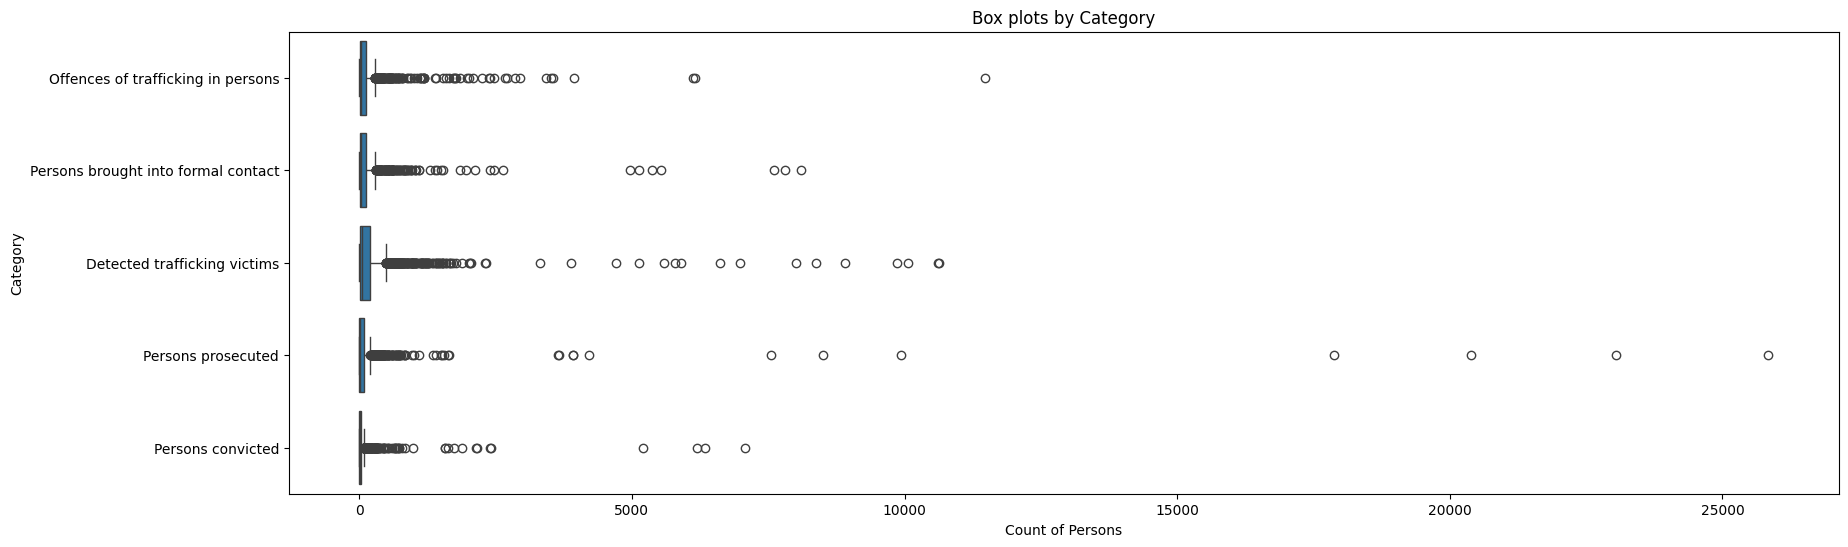

In [263]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='VALUE', y='Indicator', data=df_year_wise_total)
plt.title('Box plots by Category')
plt.xlabel('Count of Persons')
plt.ylabel('Category')
plt.show()

In [264]:
df_year_wise_total.to_csv('Total_year_wise_data.csv',index=False)